In [16]:
# Install scikit learn survivaval packages
#%pip install scikit-survival

     |████████████████████████████████| 2.5 MB 4.9 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 8.0 MB 5.2 MB/s eta 0:00:01     |██████████████████▊             | 4.7 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 13.2 MB/s eta 0:00:01
  Created wheel for scikit-survival: filename=scikit_survival-0.17.1-cp39-cp39-macosx_10_9_x86_64.whl size=2447666 sha256=ef711367e658527159f74073ae7aa41d5099298562199295f16067e5a53c83a7
  Stored in directory: /Users/peterbusienei/Library/Caches/pip/wheels/91/12/a3/993085625620697aabb693e3db29bf9021669c6d14a11080cc
Successfully built scikit-survival
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sksurv.datasets import load_flchain
from sksurv.linear_model import CoxPHSurvivalAnalysis

sns.set_style("white")
pd.set_option('max_columns', None)

In [78]:
# load the dataset
df = pd.read_csv('offspring_time_to_event.csv',  index_col = 0)
df.head(10)

,pid,idtype,exam,age1,sex,att1,educ,maritalst,marital_status,bmi,sbp,dbp,sbp_cat,dbp_cat,tchol,tchol_cat,hdlchol,hdl_cat,hdlchol_ratio_cat,bmi_cat,hba1c_cat,alb_cat,creat_cat,crp_cat,chd,chddate,chf,chfdate,cvd,cvddate,alload,chdyear,cvdyear,baselineyear,birthyear,timetoeventchddate,timetoeventcvddate
1,2924,1,2.0,36.0,2.0,1.0,<high school,Married,2.0,22.648361,108.0,88.0,0.0,0.5,165.0,0.0,56.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,2016-07-03,0.0,16620.0,0.0,2016-07-03,1.5,2016.0,2016.0,1971,1935.0,81.0,81.0
2,3297,1,2.0,31.0,1.0,1.0,<high school,Single/never married,1.0,26.476583,127.0,97.0,0.5,1.0,235.0,0.5,68.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,1982-09-19,0.0,4279.0,0.0,1982-09-19,3.0,1982.0,1982.0,1971,1940.0,42.0,42.0
3,4061,1,2.0,31.0,1.0,1.0,high school,Married,2.0,31.644676,138.0,119.0,0.5,1.0,183.0,0.0,51.0,0.5,0.0,1.0,0.0,0.0,0.5,0.5,0.0,2016-07-06,0.0,16474.0,0.0,2016-02-08,4.0,2016.0,2016.0,1971,1940.0,76.0,76.0
4,5350,1,NaN,28.0,2.0,1.0,NaN,NaN,NaN,23.858519,110.0,90.0,0.0,1.0,173.0,0.0,46.0,0.5,0.0,0.0,0.0,0.0,0.5,0.5,0.0,2011-01-15,0.0,14624.0,0.0,2011-01-15,2.5,2011.0,2011.0,1971,1943.0,68.0,68.0
5,7248,1,NaN,41.0,2.0,1.0,NaN,NaN,NaN,24.778961,125.0,106.0,0.5,1.0,260.0,1.0,53.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2000-11-27,1.0,15804.0,1.0,2000-11-27,5.0,2000.0,2000.0,1971,1930.0,70.0,70.0
6,8059,1,2.0,38.0,2.0,1.0,high school,Married,2.0,23.840380,116.0,99.0,0.0,1.0,135.0,0.0,40.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,1.0,2011-11-28,0.0,14941.0,1.0,2011-11-28,2.0,2011.0,2011.0,1971,1933.0,78.0,78.0
7,9458,1,2.0,36.0,2.0,1.0,<high school,Married,2.0,18.033648,118.0,98.0,0.0,1.0,169.0,0.0,28.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2015-10-31,0.0,16374.0,0.0,2015-10-31,4.0,2015.0,2015.0,1971,1935.0,80.0,80.0
8,14463,1,2.0,34.0,2.0,1.0,<high school,Married,2.0,26.129084,111.0,90.0,0.0,1.0,169.0,0.0,38.0,1.0,0.0,0.5,0.0,0.5,0.5,1.0,0.0,2002-04-16,0.0,11428.0,0.0,2002-04-16,4.5,2002.0,2002.0,1971,1937.0,65.0,65.0
9,14764,1,NaN,44.0,2.0,1.0,NaN,NaN,NaN,24.930847,110.0,94.0,0.0,1.0,186.0,0.0,52.0,0.5,0.0,0.0,0.0,0.0,0.5,1.0,0.0,2006-11-08,0.0,13095.0,0.0,2006-11-08,3.0,2006.0,2006.0,1971,1927.0,79.0,79.0
10,15059,1,2.0,24.0,2.0,1.0,high school,Married,2.0,16.839087,99.0,84.0,0.0,0.5,132.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,2014-03-09,0.0,15773.0,0.0,2014-03-09,1.5,2014.0,2014.0,1971,1947.0,67.0,67.0


In [79]:
# Check the missing values
df.isnull().sum()

pid                      0
idtype                   0
exam                  1238
age1                    10
sex                     10
att1                    10
educ                  1254
maritalst             1248
marital_status        1248
bmi                      0
sbp                     10
dbp                     19
sbp_cat                 10
dbp_cat                 19
tchol                   97
tchol_cat               97
hdlchol                114
hdl_cat                114
hdlchol_ratio_cat      114
bmi_cat                  0
hba1c_cat              222
alb_cat                254
creat_cat               10
crp_cat                  0
chd                     10
chddate                 10
chf                     10
chfdate                 10
cvd                     10
cvddate                 10
alload                 268
chdyear                 10
cvdyear                 10
baselineyear             0
birthyear               10
timetoeventchddate      10
timetoeventcvddate      10
d

In [80]:
# Columns
df.columns

Index(['pid', 'idtype', 'exam', 'age1', 'sex', 'att1', 'educ', 'maritalst',
       'marital_status', 'bmi', 'sbp', 'dbp', 'sbp_cat', 'dbp_cat', 'tchol',
       'tchol_cat', 'hdlchol', 'hdl_cat', 'hdlchol_ratio_cat', 'bmi_cat',
       'hba1c_cat', 'alb_cat', 'creat_cat', 'crp_cat', 'chd', 'chddate', 'chf',
       'chfdate', 'cvd', 'cvddate', 'alload', 'chdyear', 'cvdyear',
       'baselineyear', 'birthyear', 'timetoeventchddate',
       'timetoeventcvddate'],
      dtype='object')

In [81]:
# Drop Rows where Education, marital status, and maritalst is NULL
df = df.dropna(subset=['educ'])
df = df.dropna(subset=['maritalst'])
df = df.dropna(subset=['marital_status'])

In [82]:
# Drop unneccessary variables
df.drop(['pid', 'idtype', 'exam', 'att1', 
        'chd', 'chddate', 'chf',
       'chfdate',  'cvddate', 'chdyear', 'cvdyear',
       'baselineyear', 'birthyear', 'timetoeventchddate'
       ], axis = 1, inplace = True)

In [83]:
# subset data (without uninterpretable features)

df.head()

,age1,sex,educ,maritalst,marital_status,bmi,sbp,dbp,sbp_cat,dbp_cat,tchol,tchol_cat,hdlchol,hdl_cat,hdlchol_ratio_cat,bmi_cat,hba1c_cat,alb_cat,creat_cat,crp_cat,cvd,alload,timetoeventcvddate
1,36.0,2.0,<high school,Married,2.0,22.648361,108.0,88.0,0.0,0.5,165.0,0.0,56.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.5,81.0
2,31.0,1.0,<high school,Single/never married,1.0,26.476583,127.0,97.0,0.5,1.0,235.0,0.5,68.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,3.0,42.0
3,31.0,1.0,high school,Married,2.0,31.644676,138.0,119.0,0.5,1.0,183.0,0.0,51.0,0.5,0.0,1.0,0.0,0.0,0.5,0.5,0.0,4.0,76.0
6,38.0,2.0,high school,Married,2.0,23.840380,116.0,99.0,0.0,1.0,135.0,0.0,40.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,1.0,2.0,78.0
7,36.0,2.0,<high school,Married,2.0,18.033648,118.0,98.0,0.0,1.0,169.0,0.0,28.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,80.0


In [84]:
df.shape

(3759, 23)

In [85]:
# drop any na values
df.dropna(inplace=True)
df.isnull().sum()

age1                    0
sex                     0
educ                    0
maritalst               0
marital_status          0
bmi                     0
sbp                     0
dbp                     7
sbp_cat                 0
dbp_cat                 7
tchol                  64
tchol_cat              64
hdlchol                78
hdl_cat                78
hdlchol_ratio_cat      78
bmi_cat                 0
hba1c_cat             157
alb_cat               161
creat_cat               0
crp_cat                 0
cvd                     0
alload                173
timetoeventcvddate      0
dtype: int64

In [51]:
df.shape

(3586, 23)

In [52]:
print (df['educ'].unique())

['<high school' 'high school' 'some college' 'college grad']


In [53]:
# Rename the education status column into binary variables

df['educ'] = df['educ'].apply({'<high school':1, 'high school':2, 'some college':3, 'college grad':4}.get)

In [54]:
print (df['maritalst'].unique())

['Married' 'Single/never married' 'Divorced/separated' 'Widowed']


In [56]:
# Rename the marital status column into binary variables

df['maritalst'] = df['maritalst'].apply({'Married':1, 'Single/never married':2, 'Divorced/separated':3, 'Widowed':4}.get)


In [57]:
df.head()

,age1,sex,educ,maritalst,marital_status,bmi,sbp,dbp,sbp_cat,dbp_cat,tchol,tchol_cat,hdlchol,hdl_cat,hdlchol_ratio_cat,bmi_cat,hba1c_cat,alb_cat,creat_cat,crp_cat,cvd,alload,timetoeventcvddate
1,36.0,2.0,1,1,2.0,22.648361,108.0,88.0,0.0,0.5,165.0,0.0,56.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.5,81.0
2,31.0,1.0,1,2,1.0,26.476583,127.0,97.0,0.5,1.0,235.0,0.5,68.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,3.0,42.0
3,31.0,1.0,2,1,2.0,31.644676,138.0,119.0,0.5,1.0,183.0,0.0,51.0,0.5,0.0,1.0,0.0,0.0,0.5,0.5,0.0,4.0,76.0
6,38.0,2.0,2,1,2.0,23.840380,116.0,99.0,0.0,1.0,135.0,0.0,40.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,1.0,2.0,78.0
7,36.0,2.0,1,1,2.0,18.033648,118.0,98.0,0.0,1.0,169.0,0.0,28.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,80.0


In [58]:
# Drop marital_status 
df.drop(['marital_status'], axis = 1, inplace = True)

<AxesSubplot:xlabel='timetoeventcvddate', ylabel='count'>

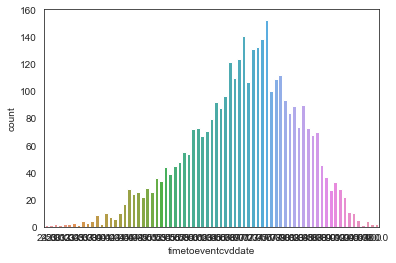

In [59]:
# visualizing event variable
sns.countplot(x="timetoeventcvddate", data=df)

<AxesSubplot:xlabel='cvd', ylabel='count'>

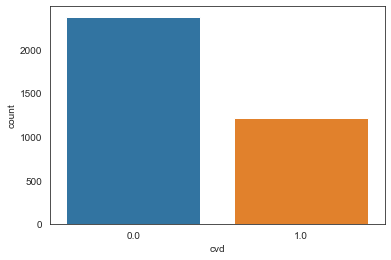

In [60]:
# visualizing event variable "cardiovascular event"
sns.countplot(x="cvd", data=df)

In [61]:
# creating survival dataset
from sksurv.datasets import get_x_y

X, y = get_x_y(df, attr_labels=['cvd','timetoeventcvddate'], pos_label=True, survival=True)

In [62]:
# Saving feature names for later use
X_list = list(X.columns)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=8)

print(f'training samples: {len(y_train)}')
print(f'validation samples: {len(y_val)}')

training samples: 2868
validation samples: 718


In [64]:
# how many of our patients were censored
n_censored = y.shape[0] - y["cvd"].sum()
print("%.1f%% of records are censored" % (n_censored / y.shape[0] * 100))

66.2% of records are censored


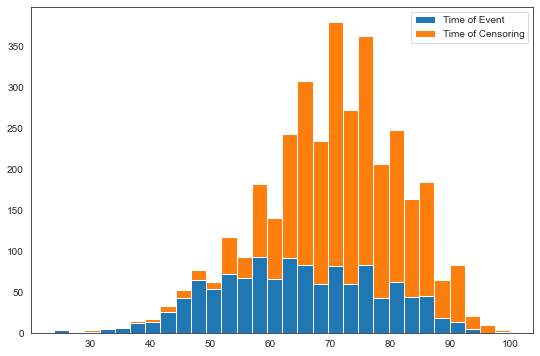

In [65]:
# visualizing distribution of our events (death) and censoring over time
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist((y["timetoeventcvddate"][y["cvd"]],
                               y["timetoeventcvddate"][~y["cvd"]]),
                              bins=30, stacked=True)
_ = plt.legend(patches, ["Time of Event", "Time of Censoring"])

# Random Forest Survival 

In [66]:
#%pip install eli5
# Load packages
from sksurv.ensemble import RandomSurvivalForest
from sksurv.compare import compare_survival
from sksurv.metrics import (concordance_index_censored,
                            concordance_index_ipcw,
                            cumulative_dynamic_auc)
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import KFold
import eli5
from eli5.sklearn import PermutationImportance

In [67]:
rsf = RandomSurvivalForest(n_estimators=1000, #default 100
                           min_samples_split=10, #default 6
                           min_samples_leaf=15, #default 3
                           #max_features="None", #auto , sqrt, log2
                           n_jobs=-1,
                           random_state=8)
rsf.fit(X_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=8)

In [68]:
# CI score
rsf.score(X_val, y_val)

0.6963490241102182

In [69]:
# eil5 feature importance
perm = PermutationImportance(rsf, n_iter=15, random_state=8)
perm.fit(X_val, y_val)
eli5.show_weights(perm, feature_names=X_list)

Weight,Feature
0.0262 ± 0.0193,alload
0.0058 ± 0.0066,crp_cat
0.0055 ± 0.0079,hdlchol
0.0038 ± 0.0055,sex
0.0031 ± 0.0039,sbp
0.0023 ± 0.0063,bmi
0.0018 ± 0.0017,educ
0.0014 ± 0.0049,hdlchol_ratio_cat
0.0006 ± 0.0030,tchol
0.0005 ± 0.0084,age1


In [76]:
# calculating our cumulative dynammic auc
times = np.arange(24.0, 98.0)


rsf_chf_funcs = rsf.predict_cumulative_hazard_function(
    X_val, return_array=False)
rsf_risk_scores = np.row_stack([chf(times) for chf in rsf_chf_funcs])

rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(
    y_train, y_val, rsf_risk_scores, times
)

ValueError: x must be within [24.000000; 94.000000]

NameError: name 'rsf_auc' is not defined

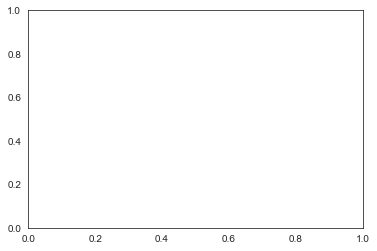

In [73]:
# plotting the time-dependent auc 
fig, ax = plt.subplots()
plt.plot(times, rsf_auc, "o-", label="RSF (mean AUC = {:.3f})".format(rsf_mean_auc))
plt.xlabel("years from transplant")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [74]:
# evaluating role of n_estimators on c-index
scores_rsf_CI = {}

rsf_CI = RandomSurvivalForest(n_jobs=-1,
                           random_state=8)
for i in range(1, 250):
    n_estimators = i * 5
    rsf_CI.set_params(n_estimators=n_estimators)
    rsf_CI.fit(X_train, y_train)
    scores_rsf_CI[n_estimators] = rsf_CI.score(X_val, y_val)

In [ ]:
# plotting the effect of n_estimators on c-index
x, y = zip(*scores_rsf_CI.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

## Random Forest

In [ ]:
rsf2 = RandomSurvivalForest(n_jobs=-1,
                           random_state=8)